### IBM Data Science Capstone (Detroit Homicide)

In [7]:
import pandas as pd
import numpy as np
from unicodedata import normalize
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import seaborn as sns

In [166]:
CJ = pd.read_csv(r'C:\Users\usmanahmad\Desktop\Datasets\DPD_Homicide_Offenses_Victims_Confirmed.csv')
CJ.head()

,FID,DATE,DAY,TIME,PRECINCT,REPORT_NO,ADDRESS,X,Y,Scout_Car_Areas,Zip_Codes,Detroit_Neighborhoods,Hardest_Hit_Fund_Areas,Counties,City_Council_Districts,ObjectId
0,1,1388534400000,WED,02:00:00,8,"1,401,010,052","173XX LENORE\nDETROIT, MI",-83.281319,42.417588,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,1388880000000,SUN,03:00:00,8,"1,401,050,155","191XX HUBBELL\nDETROIT, MI",-83.189848,42.431040,NaN,NaN,NaN,NaN,NaN,NaN,2
2,3,1388880000000,SUN,03:00:00,8,"1,401,050,155","191XX HUBBELL\nDETROIT, MI",-83.189848,42.431040,NaN,NaN,NaN,NaN,NaN,NaN,3
3,5,1389225600000,THURS,12:00:00,5,"1,401,090,139","4XX MANISTIQUE\nDETROIT, MI",-82.936278,42.366658,NaN,NaN,NaN,NaN,NaN,NaN,4
4,7,1389744000000,WED,05:00:00,5,"1,401,150,322","56XX CONNER\nDETROIT, MI",-82.983415,42.393017,NaN,NaN,NaN,NaN,NaN,NaN,5


In [167]:
CJ1 = CJ[['X','Y', 'DAY', 'DATE', 'TIME', 'PRECINCT', 'ADDRESS']] 
CJ1.dropna(inplace = True)
CJ1.reset_index(drop = True, inplace = True)
CJ1

<ipython-input-167-7d4b9475dc99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1.dropna(inplace = True)


,X,Y,DAY,DATE,TIME,PRECINCT,ADDRESS
0,-83.281319,42.417588,WED,1388534400000,02:00:00,8,"173XX LENORE\nDETROIT, MI"
1,-83.189848,42.431040,SUN,1388880000000,03:00:00,8,"191XX HUBBELL\nDETROIT, MI"
2,-83.189848,42.431040,SUN,1388880000000,03:00:00,8,"191XX HUBBELL\nDETROIT, MI"
3,-82.936278,42.366658,THURS,1389225600000,12:00:00,5,"4XX MANISTIQUE\nDETROIT, MI"
4,-82.983415,42.393017,WED,1389744000000,05:00:00,5,"56XX CONNER\nDETROIT, MI"
...,...,...,...,...,...,...,...
589,-83.047997,42.331681,SUN,1395014400000,07:00:00,12,"146XX 8 MILE\nDETROIT, MI\n(42.446554, -83.129..."
590,-83.138748,42.368742,MON,1411948800000,01:00:00,10,"98XX LIVERNOIS\nDETROIT, MI\n(42.304781, -83.1..."
591,-83.137618,42.385551,SAT,1419033600000,07:00:00,10,"43XX TYLER\nDETROIT, MI\n(42.401235, -83.096139)"
592,-83.063549,42.344730,MON,1400457600000,11:00:00,3,"6XX MARTIN LUTHER KING BLVD\nDETROIT, MI\n(42...."


In [12]:
for i in range (len(CJ1)):
    CJ1['DATE'][i] =  pd.to_datetime(CJ1['DATE'][i], unit='ms')
CJ1

<ipython-input-12-9f6ba0b83272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['DATE'][i] =  pd.to_datetime(CJ1['DATE'][i], unit='ms')
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1031: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_labels(key, value)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user

,X,Y,DAY,DATE,TIME,PRECINCT,ADDRESS
0,-83.281319,42.417588,WED,2014-01-01 00:00:00,02:00:00,8,"173XX LENORE\nDETROIT, MI"
1,-83.189848,42.431040,SUN,2014-01-05 00:00:00,03:00:00,8,"191XX HUBBELL\nDETROIT, MI"
2,-83.189848,42.431040,SUN,2014-01-05 00:00:00,03:00:00,8,"191XX HUBBELL\nDETROIT, MI"
3,-82.936278,42.366658,THURS,2014-01-09 00:00:00,12:00:00,5,"4XX MANISTIQUE\nDETROIT, MI"
4,-82.983415,42.393017,WED,2014-01-15 00:00:00,05:00:00,5,"56XX CONNER\nDETROIT, MI"
...,...,...,...,...,...,...,...
589,-83.047997,42.331681,SUN,2014-03-17 00:00:00,07:00:00,12,"146XX 8 MILE\nDETROIT, MI\n(42.446554, -83.129..."
590,-83.138748,42.368742,MON,2014-09-29 00:00:00,01:00:00,10,"98XX LIVERNOIS\nDETROIT, MI\n(42.304781, -83.1..."
591,-83.137618,42.385551,SAT,2014-12-20 00:00:00,07:00:00,10,"43XX TYLER\nDETROIT, MI\n(42.401235, -83.096139)"
592,-83.063549,42.344730,MON,2014-05-19 00:00:00,11:00:00,3,"6XX MARTIN LUTHER KING BLVD\nDETROIT, MI\n(42...."


In [20]:
CJ1['PRECINCT'].value_counts()

9     81
6     77
12    67
8     61
2     56
7     48
10    48
11    48
4     40
5     37
3     24
1      7
Name: PRECINCT, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='DATE'>

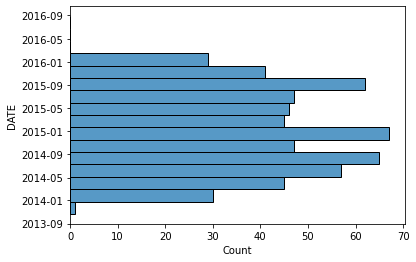

In [136]:
sns.histplot(data=CJ1, y="DATE", binwidth = 65,  binrange = (16000, 17000))

In [168]:
CJ1.replace('THURS', 'THUR', inplace = True)
CJ1.replace('TUES', 'TUE', inplace = True)
CJ1['DAY']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


0       WED
1       SUN
2       SUN
3      THUR
4       WED
       ... 
589     SUN
590     MON
591     SAT
592     MON
593     SAT
Name: DAY, Length: 594, dtype: object

<AxesSubplot:>

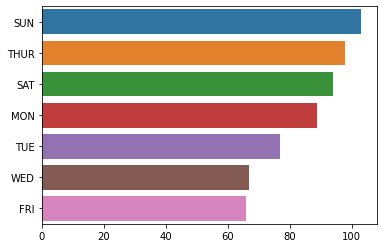

In [17]:
sns.barplot(x=CJ1['DAY'].value_counts().values , y=CJ1['DAY'].value_counts().index)

In [169]:
Days_onehot = pd.get_dummies(CJ1['DAY'])
CJ1[Days_onehot.columns.to_list()] = Days_onehot
CJ1.drop(['DAY'], axis = 1, inplace = True)
CJ1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,X,Y,DATE,TIME,PRECINCT,ADDRESS,FRI,MON,SAT,SUN,THUR,TUE,WED
0,-83.281319,42.417588,1388534400000,02:00:00,8,"173XX LENORE\nDETROIT, MI",0,0,0,0,0,0,1
1,-83.189848,42.431040,1388880000000,03:00:00,8,"191XX HUBBELL\nDETROIT, MI",0,0,0,1,0,0,0
2,-83.189848,42.431040,1388880000000,03:00:00,8,"191XX HUBBELL\nDETROIT, MI",0,0,0,1,0,0,0
3,-82.936278,42.366658,1389225600000,12:00:00,5,"4XX MANISTIQUE\nDETROIT, MI",0,0,0,0,1,0,0
4,-82.983415,42.393017,1389744000000,05:00:00,5,"56XX CONNER\nDETROIT, MI",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-83.047997,42.331681,1395014400000,07:00:00,12,"146XX 8 MILE\nDETROIT, MI\n(42.446554, -83.129...",0,0,0,1,0,0,0
590,-83.138748,42.368742,1411948800000,01:00:00,10,"98XX LIVERNOIS\nDETROIT, MI\n(42.304781, -83.1...",0,1,0,0,0,0,0
591,-83.137618,42.385551,1419033600000,07:00:00,10,"43XX TYLER\nDETROIT, MI\n(42.401235, -83.096139)",0,0,1,0,0,0,0
592,-83.063549,42.344730,1400457600000,11:00:00,3,"6XX MARTIN LUTHER KING BLVD\nDETROIT, MI\n(42....",0,1,0,0,0,0,0


In [170]:
CJ1.replace('UNKNOWN', np.nan, inplace = True)
CJ1.replace('216:am', '2:16am', inplace = True)
CJ1.replace('3;00am', '3:00am', inplace = True)
CJ1['TIME'].dtype
CJ1.dropna(inplace = True)
CJ1.reset_index(drop = True, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-170-d77b3d5e34ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1.dropna(inplace = True)


In [32]:
CJ1['TIME'].dtype

dtype('O')

In [171]:
from datetime import *
for i in range (len(CJ1)):
    CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M:%S')
   
        
            
for i in range (len(CJ1)): 
    CJ1['TIME'][i] = datetime.strftime(CJ1['TIME'][i], '%H:%M')
   
    
   
    

CJ1['TIME'][0]

<ipython-input-171-180068806e9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['TIME'][i] = datetime.strptime(CJ1['TIME'][i], '%I:%M:%S')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-171-180068806e9f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['TIME'][i] = datetime.strftime

'02:00'

In [35]:
for i in range (len(CJ1)):
    CJ1['TIME'][i] =  pd.to_datetime(CJ1['TIME'][i], format='%H:%M', errors='ignore')
CJ1

<ipython-input-35-1c4accb58432>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CJ1['TIME'][i] =  pd.to_datetime(CJ1['TIME'][i], format='%H:%M', errors='ignore')


,X,Y,DATE,TIME,PRECINCT,ADDRESS,FRI,MON,SAT,SUN,THUR,TUE,WED
0,-83.281319,42.417588,2014-01-01,1900-01-01 02:00:00,8,"173XX LENORE\nDETROIT, MI",0,0,0,0,0,0,1
1,-83.189848,42.431040,2014-01-05,1900-01-01 03:00:00,8,"191XX HUBBELL\nDETROIT, MI",0,0,0,1,0,0,0
2,-83.189848,42.431040,2014-01-05,1900-01-01 03:00:00,8,"191XX HUBBELL\nDETROIT, MI",0,0,0,1,0,0,0
3,-82.936278,42.366658,2014-01-09,1900-01-01 00:00:00,5,"4XX MANISTIQUE\nDETROIT, MI",0,0,0,0,1,0,0
4,-82.983415,42.393017,2014-01-15,1900-01-01 05:00:00,5,"56XX CONNER\nDETROIT, MI",0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-83.047997,42.331681,2014-03-17,1900-01-01 07:00:00,12,"146XX 8 MILE\nDETROIT, MI\n(42.446554, -83.129...",0,0,0,1,0,0,0
590,-83.138748,42.368742,2014-09-29,1900-01-01 01:00:00,10,"98XX LIVERNOIS\nDETROIT, MI\n(42.304781, -83.1...",0,1,0,0,0,0,0
591,-83.137618,42.385551,2014-12-20,1900-01-01 07:00:00,10,"43XX TYLER\nDETROIT, MI\n(42.401235, -83.096139)",0,0,1,0,0,0,0
592,-83.063549,42.344730,2014-05-19,1900-01-01 11:00:00,3,"6XX MARTIN LUTHER KING BLVD\nDETROIT, MI\n(42....",0,1,0,0,0,0,0


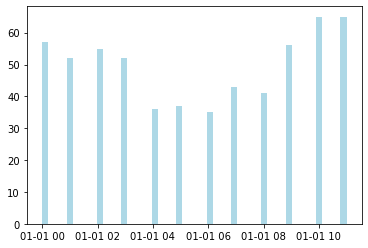

<AxesSubplot:xlabel='Count', ylabel='TIME'>

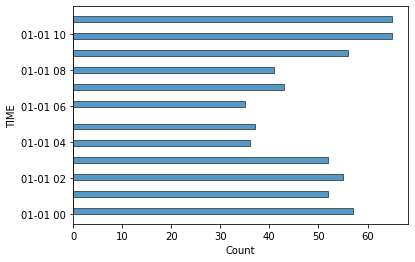

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(CJ1['TIME'], bins=50, color='lightblue')

plt.show()
sns.histplot(data=CJ1, y="TIME", bins = 35)

In [172]:


import json # library to handle JSON files



import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



In [5]:
address = 'Detroit, MI'

geolocator = Nominatim(user_agent="Detroit_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Detroit City are {}, {}.'.format(latitude, longitude))

NameError: name 'Nominatim' is not defined

In [173]:
CLIENT_ID = 'M5O4KRWYJ4VCN23KA1KH32MN3F2SH10JR24HFW1AXRBXTCWL' # your Foursquare ID
CLIENT_SECRET = 'MNTCSX11MPSQ02TSUAK1JD4VMLJ01Q5QFZ3MIG1NOX0RRW3B' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M5O4KRWYJ4VCN23KA1KH32MN3F2SH10JR24HFW1AXRBXTCWL
CLIENT_SECRET:MNTCSX11MPSQ02TSUAK1JD4VMLJ01Q5QFZ3MIG1NOX0RRW3B


In [174]:
def getNearbyVenues(latitudes, longitudes, radius=500):
    
    venues_list=[]
    for lat, lng in zip(latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([( 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [175]:
Detroit_venues = getNearbyVenues(latitudes=CJ1['Y'],
                                   longitudes=CJ1['X']
                                  )

In [47]:
Detroit_venues.groupby('Neighbourhood Latitude').count()

,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood Latitude,,,,,
42.264207,4,4,4,4,4
42.270731,4,4,4,4,4
42.305653,5,5,5,5,5
42.308151,7,7,7,7,7
42.309043,5,5,5,5,5
...,...,...,...,...,...
42.446982,17,17,17,17,17
42.447554,2,2,2,2,2
42.447745,4,4,4,4,4


In [48]:
Detroit_onehot = pd.get_dummies(Detroit_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Detroit_onehot['Neighbourhood Latitude'] = Detroit_venues['Neighbourhood Latitude'] 

# move neighborhood column to the first column
fixed_columns = [Detroit_onehot.columns[-1]] + list(Detroit_onehot.columns[:-1])
Detroit_onehot = Detroit_onehot[fixed_columns]

Detroit_onehot.head()

,Neighbourhood Latitude,ATM,Accessories Store,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,42.417588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42.417588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42.417588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.417588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42.417588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Detroit_grouped = Detroit_onehot.groupby('Neighbourhood Latitude').mean().reset_index()
Detroit_grouped

,Neighbourhood Latitude,ATM,Accessories Store,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,42.264207,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.270731,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.305653,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.308151,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42.309043,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,42.446982,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,42.447554,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,42.447745,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,42.449049,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clustering Neighbourhoods

In [50]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [77]:
# set number of clusters

kclusters = 16

Detroit_grouped_clustering = Detroit_grouped.join(CJ1.set_index('Y'), on='Neighbourhood Latitude')

Detroit_grouped_clustering1 = Detroit_grouped_clustering.drop(['TIME'], axis = 1)

Detroit_grouped_clustering.drop(['DATE', 'TIME', 'ADDRESS', 'PRECINCT'],axis = 1, inplace = True)
Detroit_grouped_clustering1.reset_index(drop = True, inplace = True)
Detroit_grouped_clustering.dropna(inplace = True)
Detroit_grouped_clustering.reset_index(drop = True, inplace = True)
Detroit_grouped_clustering1['ADDRESS']

0                                          33XX S. EDSEL
1                         S. FORT AND OMAHA\nDETROIT, MI
2                    W. LAFAYETTE AND BEARD\nDETROIT, MI
3                       W VERNOR AND SHARON\nDETROIT, MI
4      5XX CRAWFORD\nDETROIT, MI\n(42.303358, -83.103...
                             ...                        
558                                       18XX E. 8 MILE
559                            166XX EDMORE\nDETROIT, MI
560                        140XX COLLINGHAM\nDETROIT, MI
561                          196XX CARLISLE\nDETROIT, MI
562                                        154XX GRATIOT
Name: ADDRESS, Length: 563, dtype: object

In [78]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Detroit_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([ 3, 13,  1, 13,  7, 10,  7,  6,  1,  2,  1,  1,  1, 13,  2,  6, 10,
        7,  1,  2,  2, 10, 10, 13,  2,  7,  2,  2,  5,  6,  5, 13,  6,  7,
        5,  6,  2,  7,  1,  5,  5, 10,  2, 13,  1,  7,  1,  7,  7, 10, 10,
        1,  7,  7,  5,  1, 10,  7,  1,  5, 10,  1,  5,  6,  1,  2, 13, 13,
       13, 10,  5, 10, 10,  6,  2,  7, 10,  7,  2,  5,  2,  5, 10,  2,  5,
       15,  6,  6, 10,  3,  3,  5,  3, 13,  1,  5,  1,  1,  6, 13,  5,  7,
       10, 10,  6, 13,  3,  2,  6,  3,  1,  9, 10, 10, 13, 15, 13,  5, 13,
        1,  5,  1, 13, 10,  6,  6, 13,  6,  6, 10,  2,  7, 10,  5,  2,  6,
       13,  7, 11, 11,  7, 13,  2,  2,  5,  8, 13,  7,  2,  2, 10,  3,  2,
        7, 13,  2,  7,  5,  2,  6,  2,  5,  2,  1,  3,  5, 10, 13, 13,  7,
       10, 13,  5,  5,  5,  5,  6,  5, 13,  7,  1, 13,  2,  2,  6,  1,  2,
       13,  5, 13,  6, 10,  6,  2, 13, 10,  2,  5, 13, 10,  1,  1,  7, 12,
        5, 10,  1,  6, 10, 13,  7,  7, 13, 10,  2, 12,  5,  1, 10,  1,  6,
       13, 13,  6,  2,  5

In [91]:
Detroit_org = Detroit_grouped_clustering.drop(['X',
 'FRI',
 'MON',
 'SAT',
 'SUN',
 'THUR',
 'TUE',
 'WED'], axis = 1)


In [92]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [93]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood Latitude']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood Latitude'] = Detroit_org['Neighbourhood Latitude']

for ind in np.arange(Detroit_org.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Detroit_org.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,42.264207,Pizza Place,Intersection,Storage Facility,Liquor Store,Music Venue,Neighborhood,Music Store,New American Restaurant,Museum,Outdoors & Recreation
1,42.270731,Seafood Restaurant,Public Art,Lounge,Bakery,Opera House,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Optical Shop,Nightlife Spot
2,42.305653,Burger Joint,Market,Home Service,Convenience Store,Restaurant,ATM,Opera House,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop
3,42.308151,Gas Station,Mexican Restaurant,Gym / Fitness Center,Seafood Restaurant,Grocery Store,Pizza Place,Greek Restaurant,New American Restaurant,Nightclub,Neighborhood
4,42.309043,Gym,Hot Dog Joint,Travel & Transport,Market,Fast Food Restaurant,Opera House,Outdoor Sculpture,Other Repair Shop,Optical Shop,Office
...,...,...,...,...,...,...,...,...,...,...,...
558,42.446982,Pizza Place,Shoe Store,American Restaurant,Pharmacy,Restaurant,Sandwich Place,Mobile Phone Shop,Flea Market,Spa,Fried Chicken Joint
559,42.447554,Liquor Store,Intersection,ATM,Office,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Optical Shop,Opera House,Nightlife Spot
560,42.447745,Furniture / Home Store,Intersection,Food,Thrift / Vintage Store,ATM,Office,Outdoor Sculpture,Other Repair Shop,Optical Shop,Opera House
561,42.449049,Fried Chicken Joint,Discount Store,Pizza Place,Ice Cream Shop,Intersection,Shoe Store,Bank,Shop & Service,Donut Shop,Bagel Shop


In [94]:
neighborhoods_venues_sorted['Cluster Labels'] =  kmeans.labels_

neighborhoods_venues_sorted[['X','ADDRESS', 'PRECINCT',
 'FRI',
 'MON',
 'SAT',
 'SUN',
 'THUR',
 'TUE',
 'WED']] = Detroit_grouped_clustering1[['X','ADDRESS', 'PRECINCT',
 'FRI',
 'MON',
 'SAT',
 'SUN',
 'THUR',
 'TUE',
 'WED']]

neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()[:10]

ATM                    55
Intersection           31
Discount Store         25
Steakhouse             21
Park                   20
American Restaurant    18
Pizza Place            17
Convenience Store      17
Sandwich Place         15
Liquor Store           14
Name: 3rd Most Common Venue, dtype: int64

In [83]:
Detroit_merged = neighborhoods_venues_sorted
Detroit_merged.dropna(axis = 0, inplace = True)
Detroit_merged

,Neighbourhood Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,X,ADDRESS,PRECINCT,FRI,MON,SAT,SUN,THUR,TUE,WED
0,42.264207,Pizza Place,Intersection,Storage Facility,Liquor Store,Music Venue,Neighborhood,Music Store,New American Restaurant,Museum,...,-83.163954,33XX S. EDSEL,4,0,0,0,1,0,0,0
1,42.270731,Seafood Restaurant,Public Art,Lounge,Bakery,Opera House,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Optical Shop,...,-83.160188,"S. FORT AND OMAHA\nDETROIT, MI",4,0,0,0,0,0,1,0
2,42.305653,Burger Joint,Market,Home Service,Convenience Store,Restaurant,ATM,Opera House,Outdoors & Recreation,Outdoor Sculpture,...,-83.112277,"W. LAFAYETTE AND BEARD\nDETROIT, MI",4,1,0,0,0,0,0,0
3,42.308151,Gas Station,Mexican Restaurant,Gym / Fitness Center,Seafood Restaurant,Grocery Store,Pizza Place,Greek Restaurant,New American Restaurant,Nightclub,...,-83.135269,"W VERNOR AND SHARON\nDETROIT, MI",4,0,0,0,0,0,1,0
4,42.309043,Gym,Hot Dog Joint,Travel & Transport,Market,Fast Food Restaurant,Opera House,Outdoor Sculpture,Other Repair Shop,Optical Shop,...,-83.107412,"5XX CRAWFORD\nDETROIT, MI\n(42.303358, -83.103...",4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,42.446982,Pizza Place,Shoe Store,American Restaurant,Pharmacy,Restaurant,Sandwich Place,Mobile Phone Shop,Flea Market,Spa,...,-83.084493,18XX E. 8 MILE,11,0,0,0,0,1,0,0
559,42.447554,Liquor Store,Intersection,ATM,Office,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Optical Shop,Opera House,...,-82.948039,"166XX EDMORE\nDETROIT, MI",9,0,0,0,0,0,0,1
560,42.447745,Furniture / Home Store,Intersection,Food,Thrift / Vintage Store,ATM,Office,Outdoor Sculpture,Other Repair Shop,Optical Shop,...,-82.979879,"140XX COLLINGHAM\nDETROIT, MI",9,0,0,0,1,0,0,0
561,42.449049,Fried Chicken Joint,Discount Store,Pizza Place,Ice Cream Shop,Intersection,Shoe Store,Bank,Shop & Service,Donut Shop,...,-82.962666,"196XX CARLISLE\nDETROIT, MI",9,0,0,0,0,0,0,1


In [158]:
# create map
map_clusters = folium.Map(location=[42.3314, -83.0458], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
z = 5
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Detroit_merged['Neighbourhood Latitude'].where(Detroit_merged['Cluster Labels']==z).dropna(), Detroit_merged['X'].where(Detroit_merged['Cluster Labels']==z).dropna(), Detroit_merged['ADDRESS'].where(Detroit_merged['Cluster Labels']==z).dropna(), Detroit_merged['Cluster Labels'].where(Detroit_merged['Cluster Labels']==z).dropna()):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [159]:
Detroit_merged.loc[Detroit_merged['Cluster Labels'] == z, Detroit_merged.columns[[1] + list(range(2, Detroit_merged.shape[1]))]]

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,...,X,ADDRESS,PRECINCT,FRI,MON,SAT,SUN,THUR,TUE,WED
28,Coffee Shop,Sandwich Place,Steakhouse,New American Restaurant,Restaurant,Diner,Bar,Café,Cocktail Bar,Hotel,...,-83.047997,"26XX ELECTRIC\nDETROIT, MI",4,0,0,1,0,0,0,0
30,Coffee Shop,Sandwich Place,Steakhouse,New American Restaurant,Restaurant,Diner,Bar,Café,Cocktail Bar,Hotel,...,-83.047997,GREENFIELD AND JEFFRIES SERVICE DRIVE,2,0,0,1,0,0,0,0
34,Coffee Shop,Sandwich Place,Steakhouse,New American Restaurant,Restaurant,Diner,Bar,Café,Cocktail Bar,Hotel,...,-83.047997,7 MILE AND KELLY E.,9,0,0,1,0,0,0,0
39,Coffee Shop,Sandwich Place,Steakhouse,New American Restaurant,Restaurant,Diner,Bar,Café,Cocktail Bar,Hotel,...,-83.047997,"10XX JOS CAMPAU\nDETROIT, MI",7,0,0,1,0,0,0,0
40,Coffee Shop,Sandwich Place,Steakhouse,New American Restaurant,Restaurant,Diner,Bar,Café,Cocktail Bar,Hotel,...,-83.047997,"10XX JOS CAMPAU\nDETROIT, MI",7,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Liquor Store,Fried Chicken Joint,Furniture / Home Store,Coffee Shop,Opera House,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Optical Shop,Nightlife Spot,...,-83.166715,"201XX MENDOTA\nDETROIT, MI",12,0,0,1,0,0,0,0
543,Gym,Southern / Soul Food Restaurant,Bar,Cocktail Bar,Athletics & Sports,Optical Shop,Park,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,...,-83.286701,248XX W. 8 MILE,8,0,0,1,0,0,0,0
550,Marijuana Dispensary,Donut Shop,Construction & Landscaping,Hardware Store,ATM,Optical Shop,Outdoors & Recreation,Outdoor Sculpture,Other Repair Shop,Opera House,...,-83.107990,4XX WINCHESTER,12,0,0,1,0,0,0,0
555,Record Shop,Southern / Soul Food Restaurant,Fried Chicken Joint,Gas Station,Fast Food Restaurant,Seafood Restaurant,Park,Liquor Store,Jazz Club,Insurance Office,...,-83.138829,205XX GARDENDALE,12,0,0,1,0,0,0,0


In [165]:
Detroit_merged.loc[Detroit_merged['Cluster Labels'] == z, Detroit_merged.columns[[1] + list(range(2, Detroit_merged.shape[1]))]]['5th Most Common Venue'].value_counts()

Outdoor Sculpture                11
Office                            9
Music Store                       8
ATM                               8
Restaurant                        6
Music Venue                       5
Opera House                       3
Outdoors & Recreation             3
Art Gallery                       2
Liquor Store                      2
Other Repair Shop                 2
Nightlife Spot                    2
Bar                               2
Sports Club                       1
Playground                        1
Grocery Store                     1
Pizza Place                       1
Beer Bar                          1
Fast Food Restaurant              1
Convenience Store                 1
Chinese Restaurant                1
Bath House                        1
Discount Store                    1
Design Studio                     1
Vegetarian / Vegan Restaurant     1
Dessert Shop                      1
Athletics & Sports                1
American Restaurant         

In [96]:
a = neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()[:9]
b = neighborhoods_venues_sorted['2nd Most Common Venue'].value_counts()[:9]
c = neighborhoods_venues_sorted['3rd Most Common Venue'].value_counts()[:9]
d = neighborhoods_venues_sorted['4th Most Common Venue'].value_counts()[:9]
d

ATM                        44
Discount Store             30
Office                     25
Museum                     25
New American Restaurant    24
Nightlife Spot             23
Liquor Store               22
Music Store                19
Park                       18
Name: 4th Most Common Venue, dtype: int64

Text(0.5, 1.0, '4th Most Common Venue')

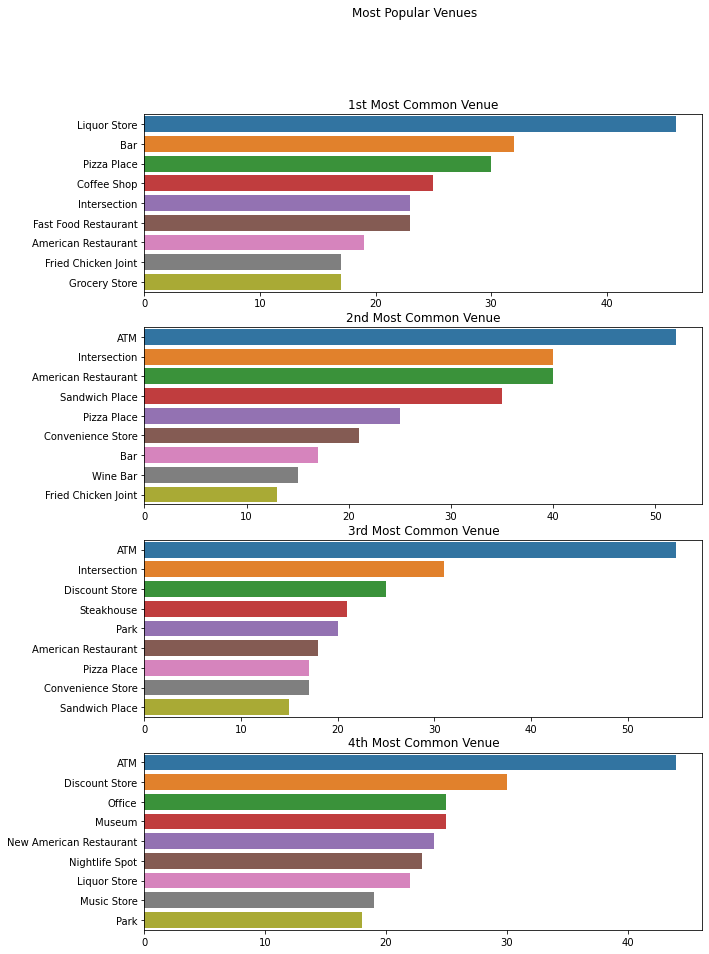

In [97]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(4, 1, figsize=(10, 15))
fig.suptitle('Most Popular Venues')

# 1st
sns.barplot(ax=axes[0], x=a.values, y=a.index)
axes[0].set_title('1st Most Common Venue')

# 2nd
sns.barplot(ax=axes[1], x=b.values, y=b.index)
axes[1].set_title('2nd Most Common Venue')

# 3rd
sns.barplot(ax=axes[2], x=c.values, y=c.index)
axes[2].set_title('3rd Most Common Venue')

# 4th
sns.barplot(ax=axes[3], x=d.values, y=d.index)
axes[3].set_title('4th Most Common Venue')
